In [196]:
import pandas as pd
import matplotlib.pyplot as plt

In [197]:
df = pd.read_csv("../data/illegal_dumping_daily.csv")

In [198]:
df_with_zcta = pd.read_csv("../data/illegal_dumping_data_with_zcta.csv")

In [199]:
df

,day,cnt
0,2016-01-10,1
1,2016-01-11,43
2,2016-01-12,40
3,2016-01-13,40
4,2016-01-14,32
...,...,...
3524,2025-09-14,17
3525,2025-09-15,118
3526,2025-09-16,101
3527,2025-09-17,99


In [200]:
df['day'] = pd.to_datetime(df['day'])
df = df.sort_values('day')

In [201]:
print(df.head())
print(df.tail())
print(df.isna().sum())

         day  cnt
0 2016-01-10    1
1 2016-01-11   43
2 2016-01-12   40
3 2016-01-13   40
4 2016-01-14   32
            day  cnt
3524 2025-09-14   17
3525 2025-09-15  118
3526 2025-09-16  101
3527 2025-09-17   99
3528 2025-09-18   49
day    0
cnt    0
dtype: int64


In [202]:
# set daily index (fill missing days with 0)
ts = (df.set_index('day')['cnt']
        .asfreq('D', fill_value=0))

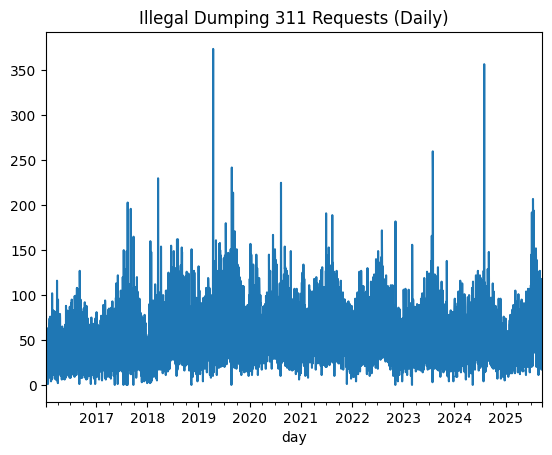

In [203]:
# quick plots
ts.plot(title='Illegal Dumping 311 Requests (Daily)')
plt.show()

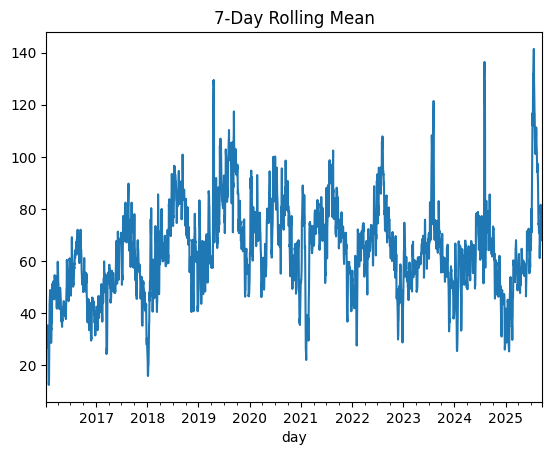

In [204]:
ts.rolling(7).mean().plot(title='7-Day Rolling Mean')
plt.show()

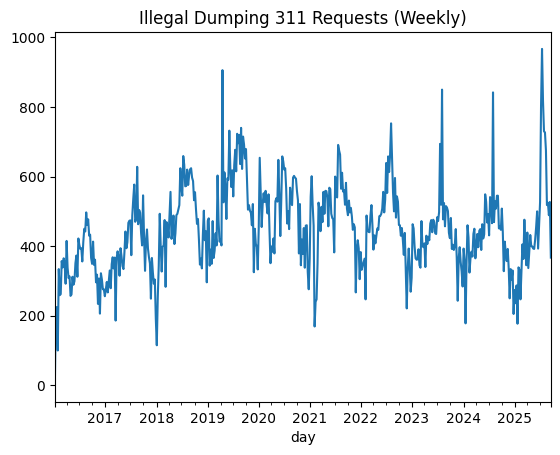

In [205]:
# aggregate to weekly (often smoother for forecasting)
ts_w = ts.resample('W').sum()
ts_w.plot(title='Illegal Dumping 311 Requests (Weekly)')
plt.show()

Filtered data contains 2449 rows from 2019-01-01 to 2025-09-18


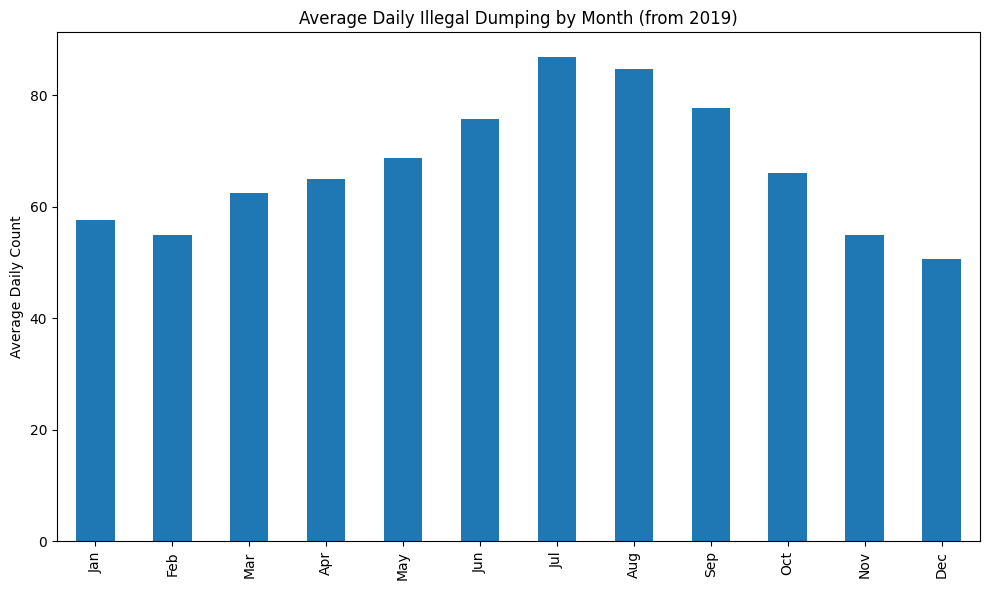

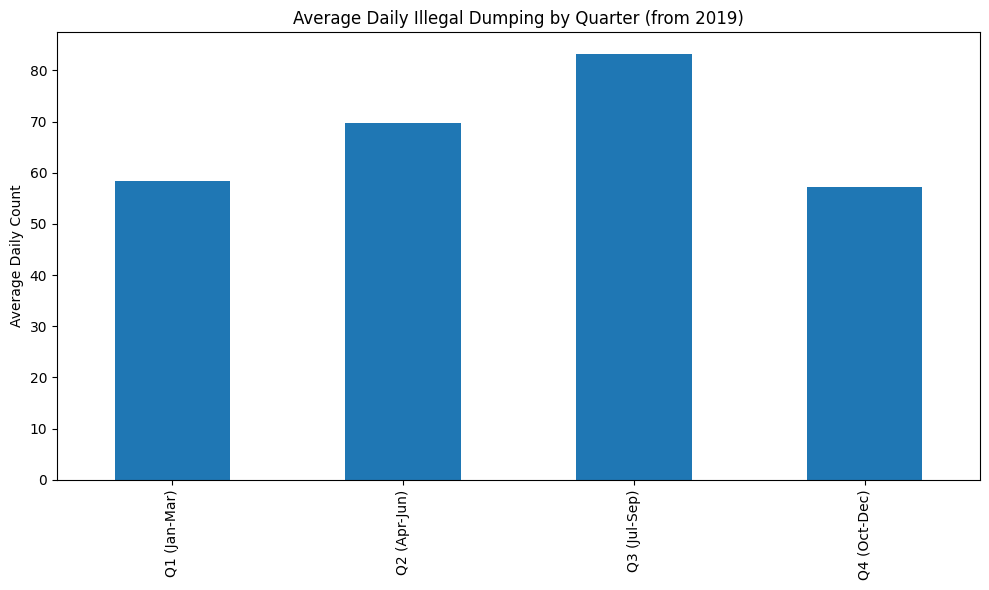

In [206]:
# Filter data from January 2019 onwards
df_filtered = df[df['day'] >= '2019-01-01']

# Display the filtered dataframe
print(f"Filtered data contains {len(df_filtered)} rows from {df_filtered['day'].min().date()} to {df_filtered['day'].max().date()}")

ts_filtered = (df_filtered.set_index('day')['cnt']
               .asfreq('D', fill_value=0))

# Create a month-based seasonal view
# Group by month and calculate average count per month
monthly_avg = ts_filtered.groupby(ts_filtered.index.month).mean()
monthly_avg.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg.plot(kind='bar', figsize=(10, 6), title='Average Daily Illegal Dumping by Month (from 2019)')
plt.ylabel('Average Daily Count')
plt.tight_layout()
plt.show()

# Create a seasonal view by quarter
quarterly_avg = ts_filtered.groupby(ts_filtered.index.quarter).mean()
quarterly_avg.index = ['Q1 (Jan-Mar)', 'Q2 (Apr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dec)']
quarterly_avg.plot(kind='bar', figsize=(10, 6), title='Average Daily Illegal Dumping by Quarter (from 2019)')
plt.ylabel('Average Daily Count')
plt.tight_layout()
plt.show()

2021 Data Points: 365
Date Range: 2021-01-01 to 2021-12-31
Average Daily Count: 69.52
Max Daily Count: 191 on 2021-06-30
Min Daily Count: 1 on 2021-11-25


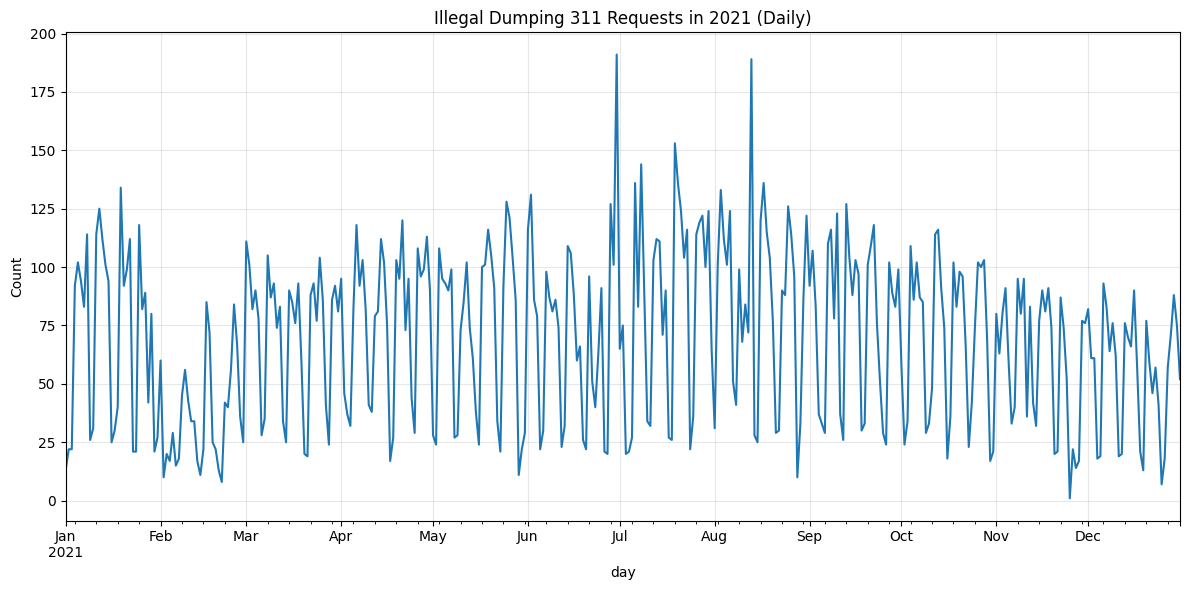

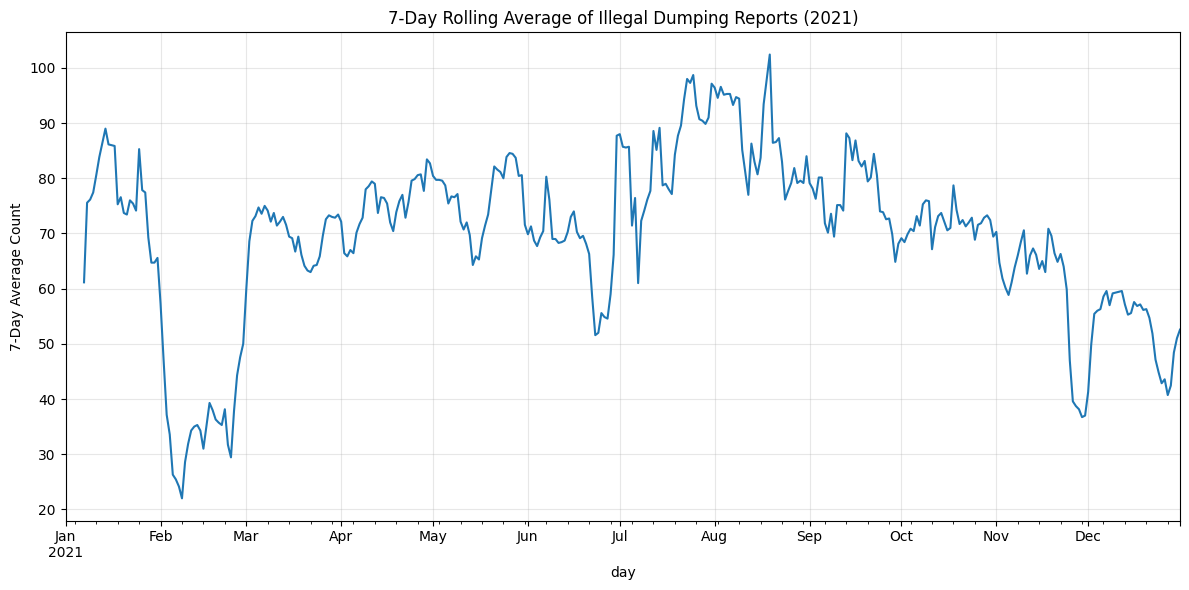

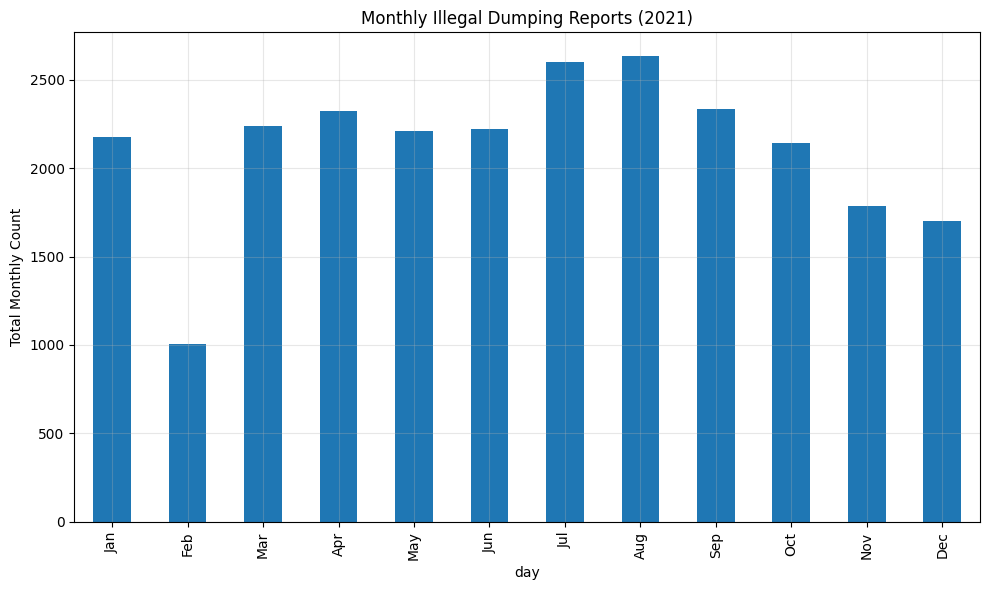

In [207]:
# Filter data for user-selected year
# No need to import exception, we can raise ValueError directly

user_selected_year = input("Enter year to analyze (e.g., 2024): ")
user_selected_year = int(user_selected_year) if user_selected_year.isdigit() else ValueError("Invalid year input.")
# If we get here, the conversion was successful
ts_year = ts[ts.index.year == user_selected_year]
# Display basic statistics
print(f"{user_selected_year} Data Points: {len(ts_year)}")
if not ts_year.empty:
	print(f"Date Range: {ts_year.index.min().date()} to {ts_year.index.max().date()}")
	print(f"Average Daily Count: {ts_year.mean():.2f}")
	print(f"Max Daily Count: {ts_year.max()} on {ts_year.idxmax().date()}")
	print(f"Min Daily Count: {ts_year.min()} on {ts_year.idxmin().date()}")
if not ts_year.empty:
	# Plot daily data for selected year
	plt.figure(figsize=(12, 6))
	ts_year.plot(title=f'Illegal Dumping 311 Requests in {user_selected_year} (Daily)')
	plt.ylabel('Count')
	plt.grid(True, alpha=0.3)
	plt.tight_layout()
	plt.show()

	# Plot 7-day rolling average for selected year
	plt.figure(figsize=(12, 6))
	ts_year.rolling(7).mean().plot(title=f'7-Day Rolling Average of Illegal Dumping Reports ({user_selected_year})')
	plt.ylabel('7-Day Average Count')
	plt.grid(True, alpha=0.3)
	plt.tight_layout()
	plt.show()

	# Monthly aggregation for selected year
	monthly_year = ts_year.resample('ME').sum()
	monthly_year.index = monthly_year.index.strftime('%b')
plt.figure(figsize=(10, 6))
monthly_year.plot(kind='bar', title=f'Monthly Illegal Dumping Reports ({user_selected_year})')
plt.ylabel('Total Monthly Count')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [208]:
filtered_df_with_zcta = df_with_zcta[df_with_zcta['GEOID20'] == 19140]

In [209]:
filtered_df_with_zcta.tail()

,day,srvccode,addr,agency_responsible,lat,lon,media_url,the_geom,cartodb_id,requested_datetime,...,index_right,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20
227476,2025-09-18T00:00:00Z,SR-ST02,1420 W BRISTOL ST,Streets Department,40.018442,-75.150249,NaN,0101000020E6100000B91C7FAC9DC952C0D1784A4C5C02...,1796322,2025-09-18T15:10:01Z,...,15555.0,19140.0,19140.0,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084
227499,2025-09-18T00:00:00Z,SR-ST02,W ERIE AVE & N 11TH ST,Streets Department,40.008557,-75.145964,NaN,0101000020E61000002028987957C952C04ED17D631801...,3155486,2025-09-18T19:24:24Z,...,15555.0,19140.0,19140.0,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084
227500,2025-09-18T00:00:00Z,SR-ST02,4200 N FRANKLIN ST,Streets Department,40.015775,-75.139629,NaN,0101000020E61000004D5C5BAFEFC852C0627F9BE60402...,3155165,2025-09-18T16:03:17Z,...,15555.0,19140.0,19140.0,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084
227521,2025-09-19T00:00:00Z,SR-ST02,1533 W COURTLAND ST,Streets Department,40.023415,-75.151031,NaN,0101000020E61000000F35587DAAC952C032E1A044FF02...,3156957,2025-09-19T23:01:54Z,...,15555.0,19140.0,19140.0,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084
227528,2025-09-19T00:00:00Z,SR-ST02,W WINGOHOCKING ST & N 9TH ST,Streets Department,40.020414,-75.140162,NaN,0101000020E6100000362FD969F8C852C0D0851DEF9C02...,3156536,2025-09-19T18:19:12Z,...,15555.0,19140.0,19140.0,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084


In [212]:
print(filtered_df_with_zcta['day'].dtype)
print(filtered_df_with_zcta['day'].head(10))

object
12     2016-01-11 00:00:00+00:00
28     2016-01-11 00:00:00+00:00
45     2016-01-12 00:00:00+00:00
49     2016-01-12 00:00:00+00:00
65     2016-01-12 00:00:00+00:00
67     2016-01-12 00:00:00+00:00
75     2016-01-12 00:00:00+00:00
85     2016-01-13 00:00:00+00:00
92     2016-01-13 00:00:00+00:00
113    2016-01-13 00:00:00+00:00
Name: day, dtype: object


In [213]:
# 1) Parse strings -> timezone-aware datetimes (UTC)
filtered_df_with_zcta["day"] = pd.to_datetime(
    filtered_df_with_zcta["day"], utc=True, errors="coerce"
)

# 2) Make tz-naive (drop timezone) and normalize to midnight
filtered_df_with_zcta["day"] = (
    filtered_df_with_zcta["day"]
      .dt.tz_localize(None)   # now dtype is datetime64[ns] (naive)
      .dt.normalize()         # 00:00:00 time
)

# 3) Quick sanity check
print(filtered_df_with_zcta["day"].dtype)  # should be datetime64[ns]
print(filtered_df_with_zcta["day"].min(), filtered_df_with_zcta["day"].max())

filtered_df_with_zcta = filtered_df_with_zcta.sort_values("day")


datetime64[ns]
2016-01-11 00:00:00 2025-09-19 00:00:00


/tmp/ipykernel_184549/2981870799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_with_zcta["day"] = pd.to_datetime(
/tmp/ipykernel_184549/2981870799.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_with_zcta["day"] = (


In [214]:
filtered_df_with_zcta["date"] = filtered_df_with_zcta["day"].dt.strftime("%Y-%m-%d")


In [ ]:
# ts_hp = (filtered_df_with_zcta.set_index('date')['freq']
#         .asfreq('D', fill_value=0))

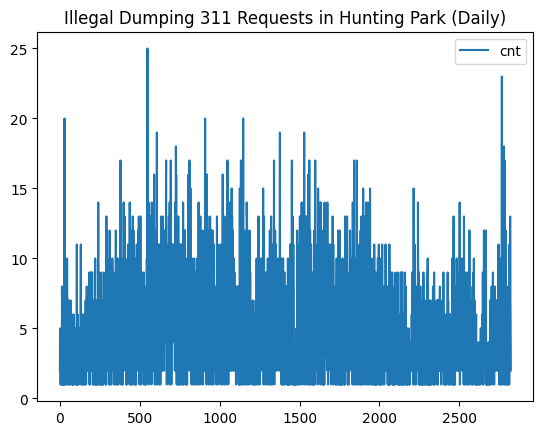

In [216]:
ts_hp.plot(title='Illegal Dumping 311 Requests in Hunting Park (Daily)')
plt.show()